# 모델 성능 확인

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # warning 메시지 숨기기

import tensorflow as tf
print("Is GPU available:", tf.test.is_gpu_available())
print('tf.__version__:',tf.__version__)

tf.config.set_visible_devices([], 'GPU')


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is GPU available: True
tf.__version__: 2.13.0


## CNN

In [55]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

# 1. CSV 파일 로드
file_path = 'model_test_merged_data.csv'
test_data = pd.read_csv(file_path)

# 2. 필요 데이터 준비 (예시: 특성과 레이블을 분리)
X_test = test_data[[f"mfcc_{i+1}" for i in range(50)]]  # 50개의 MFCC 특성
y_test = test_data['category_03']  # 레이블 (여기서는 'labelName' 사용)

# 범주형 데이터(레이블) 숫자로 변환
y_test = y_test.astype('category').cat.codes

# 3. 모델 로딩 (저장된 모델 파일이 있다면)
cnnmodel = load_model('../cnn.h5')

# 4. 예측 수행
y_pred = model.predict(X_test)

# 5. 예측 결과를 클래스 레이블로 변환
y_pred_class = np.argmax(y_pred, axis=1)  # 확률값일 경우 가장 큰 값을 갖는 클래스를 선택

# 6. 정확도 계산
accuracy = accuracy_score(y_test, y_pred_class)

# 예측 결과와 정확도 출력
print(f"모델 정확도: {accuracy * 100:.2f}% \n ")

# 예측 결과를 데이터프레임에 추가
test_data['predicted_label'] = y_pred_class

# 전체 결과 확인
print('*** 전체 데이터 ***')
print(test_data[['baseName', 'category_03' ,'predicted_label']])

60/60 [==============================] - 0s 8ms/step
모델 정확도: 75.21% 
 
*** 전체 데이터 ***
                     baseName category_03  predicted_label
0     2.motorcycle_horn_39554       이륜차경적                0
1     2.motorcycle_horn_83873       이륜차경적                0
2     2.motorcycle_horn_83258       이륜차경적                0
3     2.motorcycle_horn_83833       이륜차경적                0
4     2.motorcycle_horn_84352       이륜차경적                2
...                       ...         ...              ...
1887         1.car_horn_87870        차량경적                2
1888         1.car_horn_87371        차량경적                2
1889         1.car_horn_10533        차량경적                2
1890         1.car_horn_10800        차량경적                2
1891         1.car_horn_10273        차량경적                2

[1892 rows x 3 columns]


In [56]:
# 'category_03' 고유 값 
print(test_data['category_03'].astype('category').cat.categories)

Index(['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음'], dtype='object')


In [74]:
# 예측값을 클래스 라벨로 변환
y_pred_classes = np.argmax(y_pred, axis=1)

# 예측이 틀린 샘플 찾기
incorrect_predictions = test_data[y_test != y_pred_classes]
correct_predictions = test_data[y_test == y_pred_classes]


print('*** 맞춘 예측 결과 ***')
print(correct_predictions[['baseName', 'category_03', 'predicted_label']])

print('*** 틀린 예측 결과 ***')
print(incorrect_predictions[['baseName', 'category_03', 'predicted_label']])



*** 맞춘 예측 결과 ***
                     baseName category_03  predicted_label
0     2.motorcycle_horn_39554       이륜차경적                0
1     2.motorcycle_horn_83873       이륜차경적                0
2     2.motorcycle_horn_83258       이륜차경적                0
3     2.motorcycle_horn_83833       이륜차경적                0
5     2.motorcycle_horn_35131       이륜차경적                0
...                       ...         ...              ...
1887         1.car_horn_87870        차량경적                2
1888         1.car_horn_87371        차량경적                2
1889         1.car_horn_10533        차량경적                2
1890         1.car_horn_10800        차량경적                2
1891         1.car_horn_10273        차량경적                2

[1423 rows x 3 columns]
*** 틀린 예측 결과 ***
                     baseName category_03  predicted_label
4     2.motorcycle_horn_84352       이륜차경적                2
7     2.motorcycle_horn_84697       이륜차경적                2
11    2.motorcycle_horn_82987       이륜차경적               

In [79]:
correct_predictions.loc[:, 

,baseName,fileName,labelName,area_start,area_end,category_01,category_02,category_03,decibel,soundQuality,...,mfcc_43,mfcc_44,mfcc_45,mfcc_46,mfcc_47,mfcc_48,mfcc_49,mfcc_50,predicted_label,prediction_result
0,2.motorcycle_horn_39554,2.이륜자동차_39554.wav,2.이륜자동차_39554_1.wav,2.0,6.819,교통소음,이륜자동차,이륜차경적,74,정상,...,-2.059963,10.885640,-1.470744,-1.588405,4.085235,-2.514286,-4.690722,14.778041,0,Correct
1,2.motorcycle_horn_83873,2.이륜자동차_83873.wav,2.이륜자동차_83873_1.wav,2.0,15.869,교통소음,이륜자동차,이륜차경적,70,정상,...,4.144504,-4.226419,-16.639040,17.283014,3.024873,-9.871844,14.011795,16.118351,0,Correct
2,2.motorcycle_horn_83258,2.이륜자동차_83258.wav,2.이륜자동차_83258_1.wav,2.0,3.709,교통소음,이륜자동차,이륜차경적,72,정상,...,-11.310363,1.705206,-3.818899,-10.456730,4.374178,4.156538,-14.783348,7.079432,0,Correct
3,2.motorcycle_horn_83833,2.이륜자동차_83833.wav,2.이륜자동차_83833_1.wav,2.0,11.257,교통소음,이륜자동차,이륜차경적,74,정상,...,-5.958343,-1.455364,21.528873,-6.186168,-2.080312,15.655626,-9.131194,-11.781016,0,Correct
5,2.motorcycle_horn_35131,2.이륜자동차_35131.wav,2.이륜자동차_35131_1.wav,2.0,19.996,교통소음,이륜자동차,이륜차경적,91,정상,...,9.928519,-15.349944,-5.668061,26.087820,-0.450311,-9.250816,24.476166,5.540978,0,Correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,1.car_horn_87870,1.자동차_87870.wav,1.자동차_87870_1.wav,2.0,7.900,교통소음,자동차,차량경적,74,정상,...,1.413663,-7.150620,3.464442,9.728665,6.474899,21.784319,19.083280,-17.395393,2,Correct
1888,1.car_horn_87371,1.자동차_87371.wav,1.자동차_87371_1.wav,2.0,9.407,교통소음,자동차,차량경적,74,정상,...,6.109692,4.447698,-4.930813,-1.974725,1.361164,-6.278082,-9.898364,4.352813,2,Correct
1889,1.car_horn_10533,1.자동차_10533.wav,1.자동차_10533_1.wav,2.0,3.027,교통소음,자동차,차량경적,117,정상,...,2.008774,1.568451,-5.362859,-1.924767,1.110308,-7.310761,0.125407,6.856082,2,Correct
1890,1.car_horn_10800,1.자동차_10800.wav,1.자동차_10800_1.wav,2.0,2.667,교통소음,자동차,차량경적,110,정상,...,-3.283847,-1.378922,-2.673902,0.190642,-2.594189,0.227064,2.650267,-3.721477,2,Correct


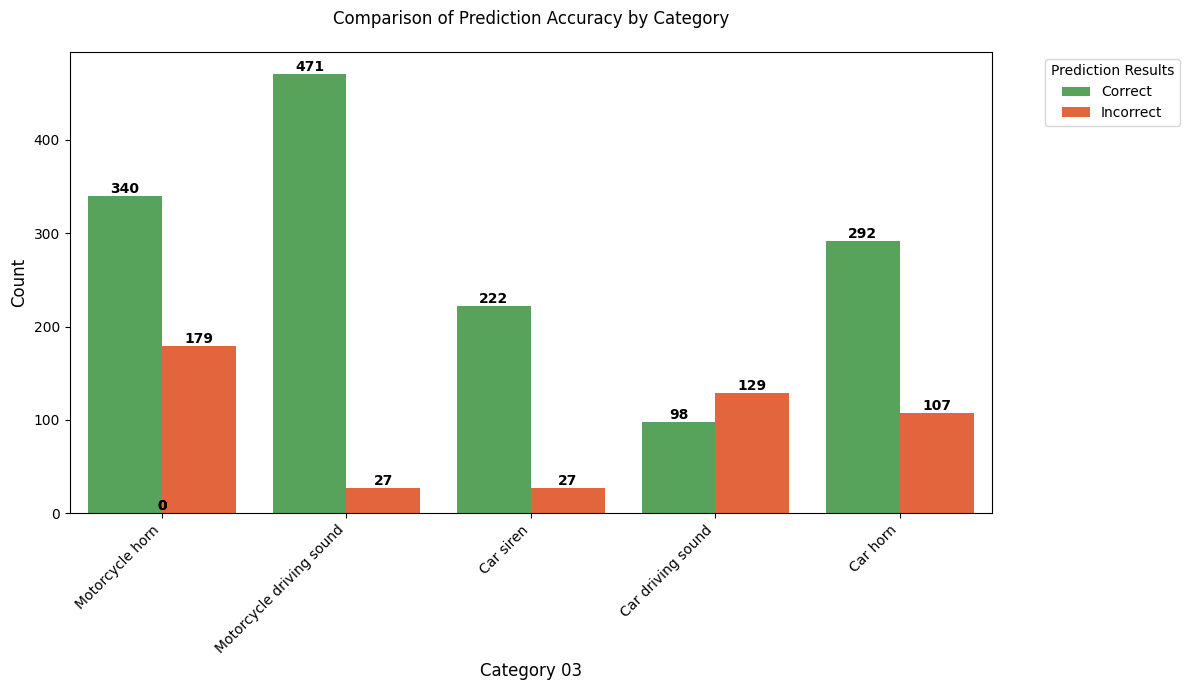

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import platform
from matplotlib import font_manager

correct_predictions.loc[:, 'prediction_result'] = 'Correct'
incorrect_predictions.loc[:, 'prediction_result'] = 'Incorrect'
all_predictions = pd.concat([correct_predictions, incorrect_predictions])

# 카테고리 03 한글 → 영어 변환  ***APPLY TRANSLATION FIRST***
category_translations = {
    '이륜차경적': 'Motorcycle horn',
    '이륜차주행음': 'Motorcycle driving sound',
    '차량경적': 'Car horn',
    '차량사이렌': 'Car siren',
    '차량주행음': 'Car driving sound'
}
all_predictions['category_03'] = all_predictions['category_03'].replace(category_translations)


# 시각화
plt.figure(figsize=(12, 7))
ax = sns.countplot(x='category_03', hue='prediction_result', data=all_predictions,
                   palette=['#4CAF50', '#FF5722'])

# 막대 위에 개수 표시 (개선된 버전)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height,
            str(int(height)),  # Convert to integer for cleaner display
            ha='center', va='bottom',
            fontsize=10, color='black',
            fontweight='bold')

plt.title('Comparison of Prediction Accuracy by Category', pad=20)
plt.xlabel('Category 03', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Prediction Results', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [66]:
print(all_predictions['category_03'].value_counts())


category_03
Motorcycle horn             519
Motorcycle driving sound    498
Car horn                    399
Car siren                   249
Car driving sound           227
Name: count, dtype: int64


In [70]:
print(correct_category_counts)
print(incorrect_category_counts)

category_03
이륜차주행음    456
이륜차경적     409
차량경적      216
차량사이렌     204
차량주행음      95
Name: count, dtype: int64
category_03
차량경적      183
차량주행음     132
이륜차경적     110
차량사이렌      45
이륜차주행음     42
Name: count, dtype: int64


## ResNet

In [23]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

# 1. CSV 파일 로드
file_path = 'model_test_merged_data.csv'
test_data = pd.read_csv(file_path)

# 2. 필요 데이터 준비 (예시: 특성과 레이블을 분리)
X_test = test_data[[f"mfcc_{i+1}" for i in range(50)]]  # 50개의 MFCC 특성
y_test = test_data['category_03']  # 레이블 (여기서는 'labelName' 사용)

# 범주형 데이터(레이블) 숫자로 변환
y_test = y_test.astype('category').cat.codes

# 3. 모델 로딩 (저장된 모델 파일이 있다면)
model = load_model('../resnet_model_mfcc50.h5')

# 4. 예측 수행
y_pred = model.predict(X_test)

# 5. 예측 결과를 클래스 레이블로 변환
y_pred_class = np.argmax(y_pred, axis=1)  # 확률값일 경우 가장 큰 값을 갖는 클래스를 선택

# 6. 정확도 계산
accuracy = accuracy_score(y_test, y_pred_class)

# 예측 결과와 정확도 출력
print(f"모델 정확도: {accuracy * 100:.2f}% \n ")

# 예측 결과를 데이터프레임에 추가
test_data['predicted_label'] = y_pred_class

# 전체 결과 확인
print('*** 전체 데이터 ***')
print(test_data[['baseName', 'category_03' ,'predicted_label']])

60/60 [==============================] - 1s 8ms/step
모델 정확도: 75.21% 
 
*** 전체 데이터 ***
                     baseName category_03  predicted_label
0     2.motorcycle_horn_39554       이륜차경적                0
1     2.motorcycle_horn_83873       이륜차경적                0
2     2.motorcycle_horn_83258       이륜차경적                0
3     2.motorcycle_horn_83833       이륜차경적                0
4     2.motorcycle_horn_84352       이륜차경적                2
...                       ...         ...              ...
1887         1.car_horn_87870        차량경적                2
1888         1.car_horn_87371        차량경적                2
1889         1.car_horn_10533        차량경적                2
1890         1.car_horn_10800        차량경적                2
1891         1.car_horn_10273        차량경적                2

[1892 rows x 3 columns]


In [24]:
# 예측값을 클래스 라벨로 변환
y_pred_classes = np.argmax(y_pred, axis=1)

# 예측이 틀린 샘플 찾기
incorrect_predictions = test_data[y_test != y_pred_classes]
correct_predictions = test_data[y_test == y_pred_classes]


print('*** 맞춘 예측 결과 ***')
print(correct_predictions[['baseName', 'category_03', 'predicted_label']])

print('*** 틀린 예측 결과 ***')
print(incorrect_predictions[['baseName', 'category_03', 'predicted_label']])



*** 맞춘 예측 결과 ***
                     baseName category_03  predicted_label
0     2.motorcycle_horn_39554       이륜차경적                0
1     2.motorcycle_horn_83873       이륜차경적                0
2     2.motorcycle_horn_83258       이륜차경적                0
3     2.motorcycle_horn_83833       이륜차경적                0
5     2.motorcycle_horn_35131       이륜차경적                0
...                       ...         ...              ...
1887         1.car_horn_87870        차량경적                2
1888         1.car_horn_87371        차량경적                2
1889         1.car_horn_10533        차량경적                2
1890         1.car_horn_10800        차량경적                2
1891         1.car_horn_10273        차량경적                2

[1423 rows x 3 columns]
*** 틀린 예측 결과 ***
                     baseName category_03  predicted_label
4     2.motorcycle_horn_84352       이륜차경적                2
7     2.motorcycle_horn_84697       이륜차경적                2
11    2.motorcycle_horn_82987       이륜차경적               

/tmp/ipykernel_6366/2809915617.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_predictions['prediction_result'] = 'Correct'
/tmp/ipykernel_6366/2809915617.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect_predictions['prediction_result'] = 'Incorrect'


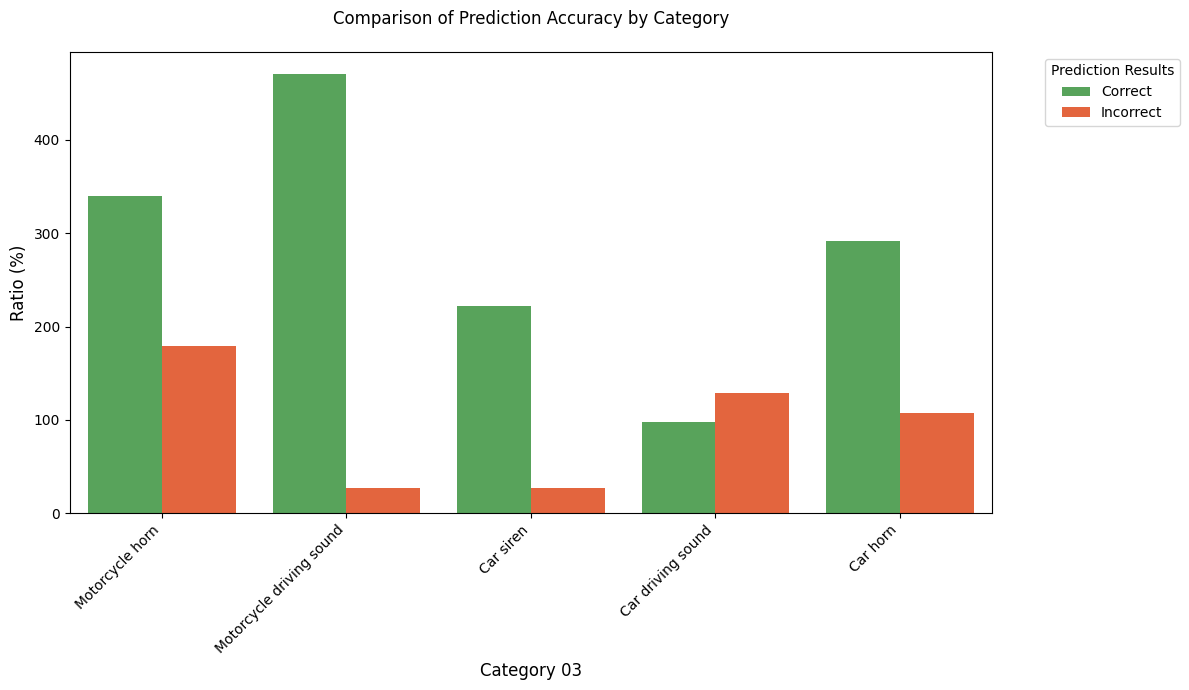

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import platform
from matplotlib import font_manager


correct_predictions['prediction_result'] = 'Correct'
incorrect_predictions['prediction_result'] = 'Incorrect'
all_predictions = pd.concat([correct_predictions, incorrect_predictions])

# 카테고리 03 한글 → 영어 변환 (예시 사전)
category_translations = {
    '이륜차경적': 'Motorcycle horn',
    '이륜차주행음': 'Motorcycle driving sound',
    '차량경적': 'Car horn',
    '차량사이렌': 'Car siren',
    '차량주행음': 'Car driving sound'
}

# 변환 적용
all_predictions['category_03'] = all_predictions['category_03'].replace(category_translations)



# 비율 계산 최적화
result_counts = all_predictions.groupby('category_03')['prediction_result'].value_counts(normalize=True).unstack()
result_counts = result_counts.fillna(0) * 100


plt.figure(figsize=(12, 7))
sns.countplot(x='category_03', hue='prediction_result', data=all_predictions, palette=['#4CAF50', '#FF5722'])

plt.title('Comparison of Prediction Accuracy by Category', pad=20)
plt.xlabel('Category 03', fontsize=12)
plt.ylabel('Ratio (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Prediction Results', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
